In [ ]:
https://colab.research.google.com/drive/1lmj6Ms3c88El3uSMQpJ6KNkhJc_wTksh?usp=sharing

#Ex 3.1.18

Problem 18: Industrial Fan Lifetime Interpolation
Temperature data (°C): [25. 40. 50. 60.]
Lifetime data (hrs x 1000): [95. 75. 63. 54.]

Coefficients of interpolating polynomial in nested form
from degree 0 to highest degree:
 [ 9.50000000e+01 -1.33333333e+00  5.33333333e-03  2.76190476e-04]

Verification of interpolation at given data points:
---------------------------------------------------------------------
|   Temp   |      Lifetime        |       p(x)           |  error   |
|   (°C)   |    (hrs x 1000)      |    (hrs x 1000)      |          |
---------------------------------------------------------------------
|     25.0 |  95.0000000000000000 |  95.0000000000000000 |  0.0e+00 |
|     40.0 |  75.0000000000000000 |  75.0000000000000000 |  0.0e+00 |
|     50.0 |  63.0000000000000000 |  63.0000000000000000 |  0.0e+00 |
|     60.0 |  54.0000000000000000 |  54.0000000000000000 |  0.0e+00 |
---------------------------------------------------------------------
Absolute error =  0.0e+

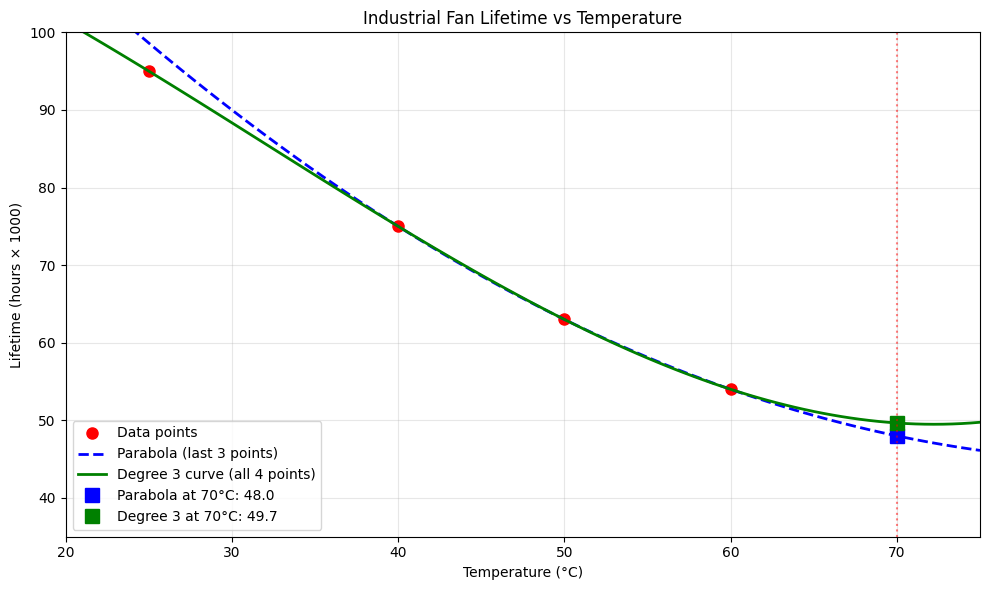

Summary:
• Parabola estimate at 70°C: 48.00 thousand hours
• Degree 3 curve estimate at 70°C: 49.66 thousand hours
• Difference: 1.66 thousand hours
(b) Cubic estimate at 70°C:    49.66 × 1000 hours = 49657 hours


In [5]:
#3.1.18

import copy
import numpy as np
import matplotlib.pyplot as plt

def newtdd_inplace( x, y ):
    n = len( x )
    for i in range(1,n):
        for j in range(n-i-1,-1,-1):
            y[j+i] = ( y[j+i] - y[j+i-1] ) / ( x[j+i] - x[j] )
    return y

def newtdd( x, y ):
    c = copy.deepcopy( y )
    newtdd_inplace( x, c )
    return c

def polyval_nested_w_base_points( c, b, x ):
    d = np.size(c)
    px = c[ d-1 ] * np.ones( np.shape(x) )
    for i in range( d-2, -1, -1 ):
        px = px * ( x - b[i] ) + c[i]
    return px

# Problem 18 data - Industrial fan lifetime
x = np.array([25., 40., 50., 60.])  # Temperature in °C
y = np.array([95., 75., 63., 54.])  # Lifetime in hours (x 1000)

print("Problem 18: Industrial Fan Lifetime Interpolation")
print("Temperature data (°C):", x)
print("Lifetime data (hrs x 1000):", y)
print()

# Calculate Newton's divided difference coefficients
c = newtdd( x, y )
print("Coefficients of interpolating polynomial in nested form")
print("from degree 0 to highest degree:\n", c)
print()

# Verify interpolation at given points
yy = polyval_nested_w_base_points( c, x, x )
err = abs( yy - y )
print("Verification of interpolation at given data points:")
print("---------------------------------------------------------------------")
print("|   Temp   |      Lifetime        |       p(x)           |  error   |")
print("|   (°C)   |    (hrs x 1000)      |    (hrs x 1000)      |          |")
print("---------------------------------------------------------------------")
for i in range(0, len(x)):
    print("|", f"{x[i]: 8.1f}","|", f"{y[i]: 20.16f}","|", f"{yy[i]: 20.16f}","|", f"{err[i]: 3.1e}","|")
print("---------------------------------------------------------------------")
print("Absolute error = ", f"{np.linalg.norm( y - yy, np.inf):6.1e}")
print()

# Part (a): Estimate lifetime at 70°C using parabola from last three points
print("Part (a): Parabola from last three data points (40°C, 50°C, 60°C)")
x_parabola = np.array([40., 50., 60.])
y_parabola = np.array([75., 63., 54.])
c_parabola = newtdd( x_parabola, y_parabola )
lifetime_70_parabola = polyval_nested_w_base_points( c_parabola, x_parabola, 70 )
print(f"Estimated lifetime at 70°C using parabola: {lifetime_70_parabola:.2f} thousand hours")
print()

# Part (b): Estimate lifetime at 70°C using degree 3 curve from all four points
print("Part (b): Degree 3 curve using all four data points")
lifetime_70_cubic = polyval_nested_w_base_points( c, x, 70 )
print(f"Estimated lifetime at 70°C using degree 3 curve: {lifetime_70_cubic:.2f} thousand hours")
print()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot original data points
plt.plot(x, y, 'ro', markersize=8, label='Data points')

# Generate smooth curves for plotting
temp_range = np.linspace(20, 75, 100)

# Parabola from last three points
y_parabola_plot = polyval_nested_w_base_points( c_parabola, x_parabola, temp_range )
plt.plot(temp_range, y_parabola_plot, 'b--', linewidth=2, label='Parabola (last 3 points)')

# Degree 3 curve from all points
y_cubic_plot = polyval_nested_w_base_points( c, x, temp_range )
plt.plot(temp_range, y_cubic_plot, 'g-', linewidth=2, label='Degree 3 curve (all 4 points)')

# Mark the estimates at 70°C
plt.plot(70, lifetime_70_parabola, 'bs', markersize=10, label=f'Parabola at 70°C: {lifetime_70_parabola:.1f}')
plt.plot(70, lifetime_70_cubic, 'gs', markersize=10, label=f'Degree 3 at 70°C: {lifetime_70_cubic:.1f}')

plt.xlabel('Temperature (°C)')
plt.ylabel('Lifetime (hours × 1000)')
plt.title('Industrial Fan Lifetime vs Temperature')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(20, 75)
plt.ylim(35, 100)

# Add vertical line at 70°C
plt.axvline(x=70, color='red', linestyle=':', alpha=0.5, label='70°C')

plt.tight_layout()
plt.show()

print("Summary:")
print(f"• Parabola estimate at 70°C: {lifetime_70_parabola:.2f} thousand hours")
print(f"• Degree 3 curve estimate at 70°C: {lifetime_70_cubic:.2f} thousand hours")
print(f"• Difference: {abs(lifetime_70_cubic - lifetime_70_parabola):.2f} thousand hours")
print(f"(b) Cubic estimate at 70°C:    {lifetime_70_cubic:.2f} × 1000 hours = {lifetime_70_cubic*1000:.0f} hours")

#CP 3.1.4

Step 1: Choosing fundamental domain for cosine
We'll use [0, π/2] as the fundamental domain
This allows us to use symmetry properties:
- cos(x) = cos(-x) (even function)
- cos(π-x) = -cos(x)
- cos(2π-x) = cos(x)

Step 2: Interpolation points for cosine
    |   x      |   cos(x) |
 0  |   0.000  |   1.000  | 
 1  |   0.524  |   0.866  | 
 2  |   1.047  |   0.500  | 
 3  |   1.571  |   0.000  | 

Step 3: Coefficients of cosine interpolating polynomial in nested form:
  1.0000000000000000,
 -0.2558726308373680,
 -0.4232099247847019,
  0.1138718990714119

Step 4: Verification of cosine interpolation at given data points:
---------------------------------------------------------------------
|    x     |        cos(x)        |        p(x)          |  error   |
---------------------------------------------------------------------
|  0.00000 |   1.0000000000000000 |   1.0000000000000000 |  0.0e+00 |
|  0.52360 |   0.8660254037844386 |   0.8660254037844386 |  0.0e+00 |
|  1.04720 |   0.50000000

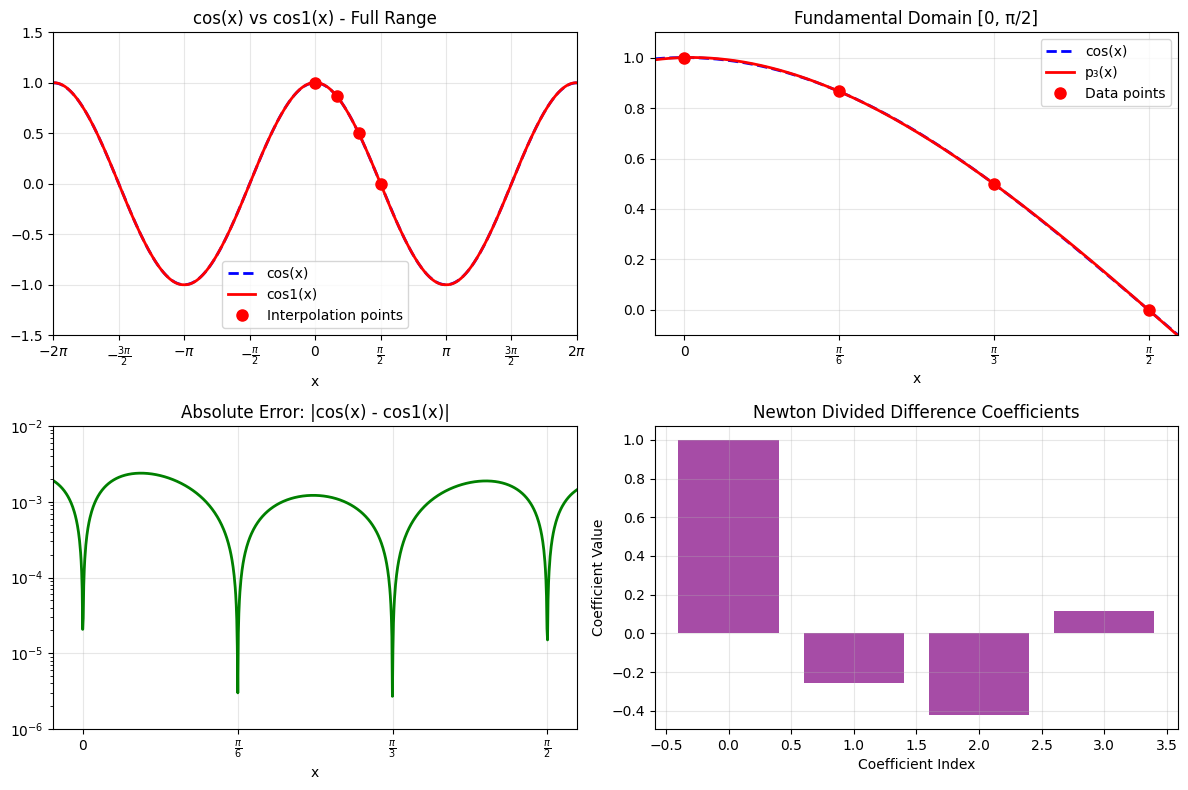

Summary:
1. Fundamental domain chosen: [0, π/2]
2. Interpolation points: 0, π/6, π/3, π/2
3. Used cosine symmetry properties:
   - cos(x) = cos(-x) (even function)
   - cos(π-x) = -cos(x)
   - cos(2π-x) = cos(x)
   - cos(x+2π) = cos(x) (periodicity)
4. Maximum error estimate: 2.4e-03
5. The cos1 function successfully approximates cosine across all real numbers!


In [9]:
#CP 3.1.4
import numpy as np
from math import pi
from math import sqrt
import matplotlib.pyplot as plt
import copy

def newtdd_inplace( x, y ):
    n = len( x )
    for i in range(1,n):
        for j in range(n-i-1,-1,-1):
            y[j+i] = ( y[j+i] - y[j+i-1] ) / ( x[j+i] - x[j] )
    return y

def newtdd( x, y ):
    c = copy.deepcopy( y )
    newtdd_inplace( x, c )
    return c

def polyval_nested_w_base_points( c, b, x ):
    d = np.size(c)
    px = c[ d-1 ] * np.ones( np.shape(x) )
    for i in range( d-2, -1, -1 ):
        px = px * ( x - b[i] ) + c[i]
    return px

# Step 1: Choose fundamental domain for cosine
# For cosine, we can use [0, π/2] since cos(x) = cos(-x) and cos(π-x) = -cos(x)
print("Step 1: Choosing fundamental domain for cosine")
print("We'll use [0, π/2] as the fundamental domain")
print("This allows us to use symmetry properties:")
print("- cos(x) = cos(-x) (even function)")
print("- cos(π-x) = -cos(x)")
print("- cos(2π-x) = cos(x)")
print()

# Step 2: Set up interpolation points for cosine in [0, π/2]
x_cos = np.array([0., pi/6., pi/3., pi/2.])
y_cos = np.array([1., sqrt(3.)/2., 0.5, 0.])  # cosine values at these points

print("Step 2: Interpolation points for cosine")
print("    |   x      |   cos(x) |")
for i in range(0,len(x_cos)):
    print(f"{i:2d}", " | ", f"{x_cos[i]:6.3f}", " | ", f"{y_cos[i]:6.3f}", " | ")
print()

# Step 3: Compute Newton's divided difference coefficients for cosine
c_cos = newtdd(x_cos, y_cos)
print("Step 3: Coefficients of cosine interpolating polynomial in nested form:")
for i in range(0,len(c_cos)-1):
    print(f"{c_cos[i]: 20.16f},")
print(f"{c_cos[-1]: 20.16f}")
print()

# Step 4: Verify interpolation accuracy
yy_cos = polyval_nested_w_base_points(c_cos, x_cos, x_cos)
err_cos = abs(yy_cos - y_cos)
print("Step 4: Verification of cosine interpolation at given data points:")
print("---------------------------------------------------------------------")
print("|    x     |        cos(x)        |        p(x)          |  error   |")
print("---------------------------------------------------------------------")
for i in range(0,len(x_cos)):
    print("|",f"{x_cos[i]: 7.5f}","|", f"{y_cos[i]: 20.16f}","|", f"{yy_cos[i]: 20.16f}","|", f"{err_cos[i]: 3.1e}","|")
print("---------------------------------------------------------------------")
print()

# Step 5: Implement cos1 function using symmetry properties
def cos1(x):
    """
    Cosine approximation using polynomial interpolation on [0, π/2]
    Uses symmetry properties to extend to all real numbers
    """
    y = copy.deepcopy(x)
    b = np.array([0., pi/6., pi/3., pi/2.])
    c = c_cos  # Use the coefficients we computed

    for i in range(0, len(y)):
        # Reduce to [0, 2π] using periodicity
        y[i] = np.mod(y[i], 2*pi)

        # Use symmetry to reduce to [0, π/2]
        sign = 1

        # Handle [π, 2π] using cos(2π - x) = cos(x)
        if y[i] > pi:
            y[i] = 2*pi - y[i]

        # Handle [π/2, π] using cos(π - x) = -cos(x)
        if y[i] > pi/2:
            y[i] = pi - y[i]
            sign = -1

        # Now y[i] is in [0, π/2], evaluate polynomial
        y[i] = sign * polyval_nested_w_base_points(c, b, y[i])

    return y

# Step 6: Test the cos1 function
print("Step 5: Testing cos1 function")
test_x = np.array([0., pi/6., pi/4., pi/3., pi/2., pi, 3*pi/2, 2*pi, 5., 10.])
true_cos = np.cos(test_x)
approx_cos = cos1(test_x)
errors = np.abs(true_cos - approx_cos)

print("-------------------------------------------------------------")
print("|   x   | cos(x)  | cos1(x) |  error  |   error   |")
print("-------------------------------------------------------------")
for i in range(len(test_x)):
    print("|",f"{test_x[i]: 5.2f}","|", f"{true_cos[i]: .4f}","|", f"{approx_cos[i]: .4f}","|", f"{errors[i]: 6.4f}","|", f"{errors[i]: 3.1e}","|")
print("-------------------------------------------------------------")
print()

# Step 7: Estimate maximum error
xx_test = np.linspace(-10., 10., 10000)
true_cos_test = np.cos(xx_test)
approx_cos_test = cos1(xx_test)
max_error = np.linalg.norm(true_cos_test - approx_cos_test, np.inf)
print(f"Maximum error estimate for cos1: {max_error: 3.1e}")
print()

# Step 8: Visualization
# Plot 1: Full range comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
xx = np.linspace(-2*pi, 2*pi, 1000)
true_cos_plot = np.cos(xx)
approx_cos_plot = cos1(xx)
plt.plot(xx, true_cos_plot, '--b', label='cos(x)', linewidth=2)
plt.plot(xx, approx_cos_plot, '-r', label='cos1(x)', linewidth=2)
plt.plot(x_cos, y_cos, 'ro', markersize=8, label='Interpolation points')
plt.xlabel('x')
plt.xlim([-2*pi, 2*pi])
plt.ylim([-1.5, 1.5])
plt.xticks(np.linspace(-2*pi, 2*pi, 9),
           [r'$-2\pi$', r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$',
            r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('cos(x) vs cos1(x) - Full Range')

# Plot 2: Fundamental domain [0, π/2]
plt.subplot(2, 2, 2)
xx_fund = np.linspace(-0.1, pi/2 + 0.1, 1000)
true_cos_fund = np.cos(xx_fund)
approx_cos_fund = polyval_nested_w_base_points(c_cos, x_cos, xx_fund)
plt.plot(xx_fund, true_cos_fund, '--b', label='cos(x)', linewidth=2)
plt.plot(xx_fund, approx_cos_fund, '-r', label='p₃(x)', linewidth=2)
plt.plot(x_cos, y_cos, 'ro', markersize=8, label='Data points')
plt.xlabel('x')
plt.xlim([-0.1, pi/2 + 0.1])
plt.ylim([-0.1, 1.1])
plt.xticks(np.linspace(0, pi/2, 4), ['0', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$', r'$\frac{\pi}{2}$'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Fundamental Domain [0, π/2]')

# Plot 3: Error analysis
plt.subplot(2, 2, 3)
xx_error = np.linspace(-0.1, pi/2 + 0.1, 1000)
error_plot = np.abs(np.cos(xx_error) - cos1(xx_error))
plt.semilogy(xx_error, error_plot, '-g', linewidth=2)
plt.xlabel('x')
plt.xlim([-0.1, pi/2 + 0.1])
plt.ylim([1e-6, 1e-2])
plt.xticks(np.linspace(0, pi/2, 4), ['0', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$', r'$\frac{\pi}{2}$'])
plt.title('Absolute Error: |cos(x) - cos1(x)|')
plt.grid(True, alpha=0.3)

# Plot 4: Polynomial coefficients visualization
plt.subplot(2, 2, 4)
plt.bar(range(len(c_cos)), c_cos, alpha=0.7, color='purple')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Newton Divided Difference Coefficients')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Summary:")
print("========")
print("1. Fundamental domain chosen: [0, π/2]")
print("2. Interpolation points: 0, π/6, π/3, π/2")
print("3. Used cosine symmetry properties:")
print("   - cos(x) = cos(-x) (even function)")
print("   - cos(π-x) = -cos(x)")
print("   - cos(2π-x) = cos(x)")
print("   - cos(x+2π) = cos(x) (periodicity)")
print(f"4. Maximum error estimate: {max_error:.1e}")
print("5. The cos1 function successfully approximates cosine across all real numbers!")